In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Pearson

In [6]:
# pandas

correlation = df.drop("abbrev", axis=1).corr(method="pearson")
correlation

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [11]:
# scipy

correlation_scipy, p_value = pearsonr(df["speeding"], df["alcohol"])
print(f"Correlation {correlation_scipy}, P_value {p_value}")

Correlation 0.6697185644227317, P_value 7.695399312571978e-08


In [13]:
# numpy

correlation_numpy = np.corrcoef(df.drop("abbrev", axis=1), rowvar=False)
correlation_numpy

array([[ 1.        ,  0.6115476 ,  0.85261322,  0.82756035,  0.95617917,
        -0.19970195, -0.03601108],
       [ 0.6115476 ,  1.        ,  0.66971856,  0.5880104 ,  0.57197553,
        -0.07767466, -0.06592781],
       [ 0.85261322,  0.66971856,  1.        ,  0.73281638,  0.78351995,
        -0.17061197, -0.11254674],
       [ 0.82756035,  0.5880104 ,  0.73281638,  1.        ,  0.74730654,
        -0.17485626, -0.07596974],
       [ 0.95617917,  0.57197553,  0.78351995,  0.74730654,  1.        ,
        -0.1568952 , -0.00635865],
       [-0.19970195, -0.07767466, -0.17061197, -0.17485626, -0.1568952 ,
         1.        ,  0.62311644],
       [-0.03601108, -0.06592781, -0.11254674, -0.07596974, -0.00635865,
         0.62311644,  1.        ]])

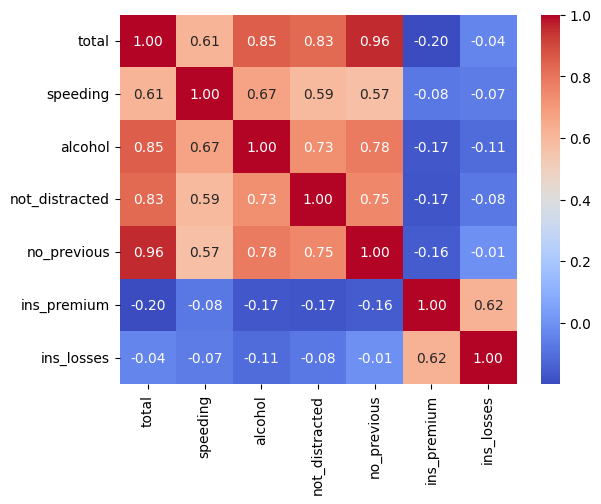

In [16]:
# seaborn (heatmap)

correlation_matrix = df.drop("abbrev", axis=1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## Spearman

In [ ]:
# scipy

from scipy.stats import spearmanr

correlation_scipy, p_value = spearmanr(df["speeding"], df["alcohol"])

print(f"Correlation: {correlation_scipy}, P_value: {p_value:.10f}")

Correlation: 0.6426535137336532, P_value: 0.0000003688


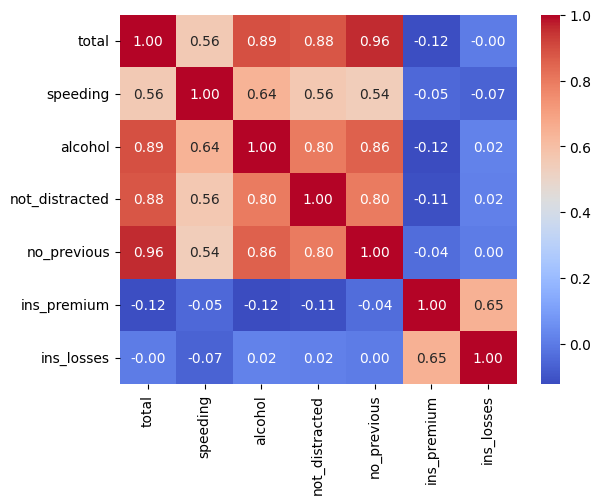

In [19]:
# pandas

correlation_matrix = df.drop("abbrev", axis=1).corr(method="spearman")

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

<Figure size 1200x800 with 0 Axes>

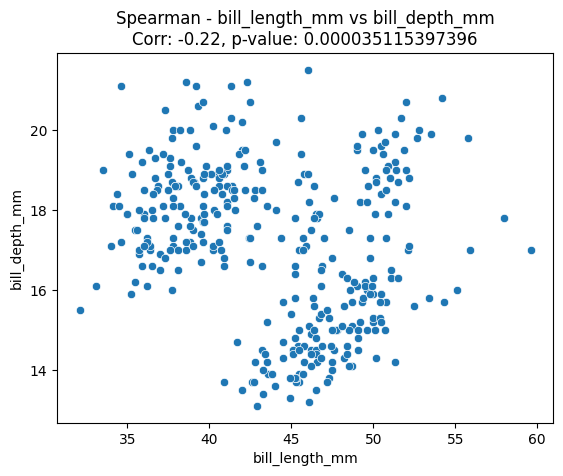

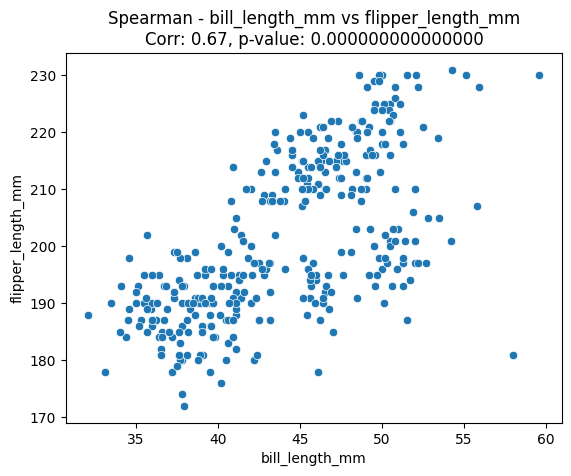

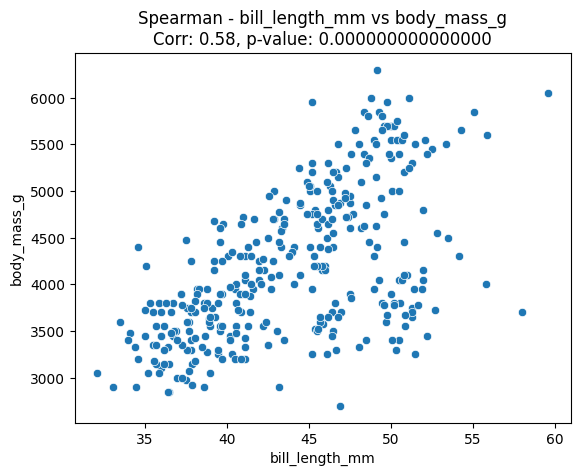

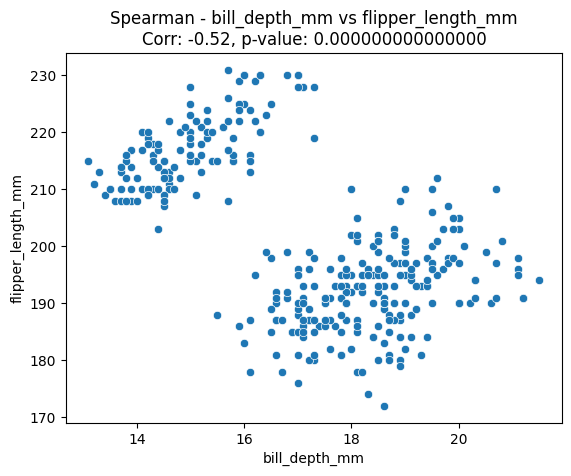

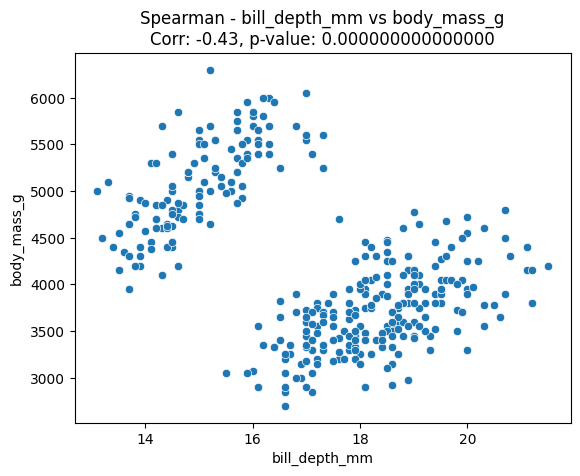

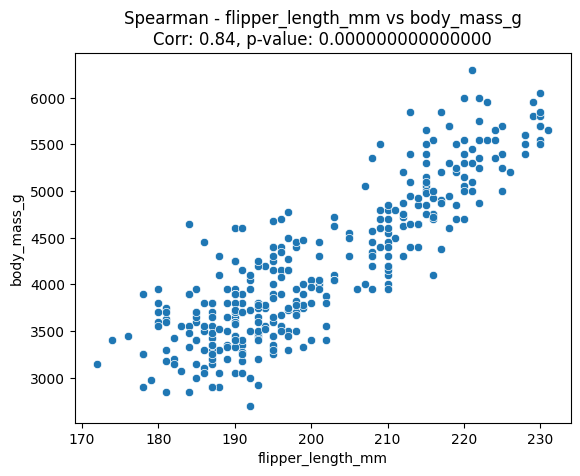

In [ ]:
# Verificando a distribuições de cada variável e aplicando correlações (Spearman ou Pearson) dependendo da distribuição dos dados e do p_value

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, pearsonr, spearmanr
from itertools import combinations

df_penguins = sns.load_dataset("penguins")
df_numeric = df_penguins.select_dtypes(include=[np.number])

normalidade = {}
for col in df_numeric.columns:
    if len(df_numeric[col].dropna()) >= 3:
        _, p_value = shapiro(df_numeric[col].dropna())
        normalidade[col] = p_value >= 0.05
    else:
        normalidade[col] = False 

correlacoes = []
for col1, col2 in combinations(df_numeric.columns, 2):
    dados1, dados2 = df_numeric[col1].dropna(), df_numeric[col2].dropna()
    
    if len(dados1) > 2 and len(dados2) > 2: 
        if normalidade[col1] and normalidade[col2]:
            corr, p_value = pearsonr(dados1, dados2)
            metodo = "Pearson"
        else:
            corr, p_value = spearmanr(dados1, dados2)
            metodo = "Spearman"

        correlacoes.append([col1, col2, corr, p_value, metodo])

correlacoes_df = pd.DataFrame(correlacoes, columns=["Variavel1", "Variavel2", "Correlacao", "p_value", "Metodo"])

correlacoes_significativas = correlacoes_df[correlacoes_df["p_value"] < 0.05]

if not correlacoes_significativas.empty:
    plt.figure(figsize=(12, 8))
    for _, row in correlacoes_significativas.iterrows():
        var1, var2 = row["Variavel1"], row["Variavel2"]
        corr_val = row["Correlacao"]
        p_val = row["p_value"]
        metodo = row["Metodo"]
        
        plt.figure()
        sns.scatterplot(x=df_numeric[var1], y=df_numeric[var2])
        plt.title(f"{metodo} - {var1} vs {var2}\nCorr: {corr_val:.2f}, p-value: {p_val:.15f}")
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()
else:
    print("Nenhuma correlação estatisticamente significativa encontrada.")


## Kendall

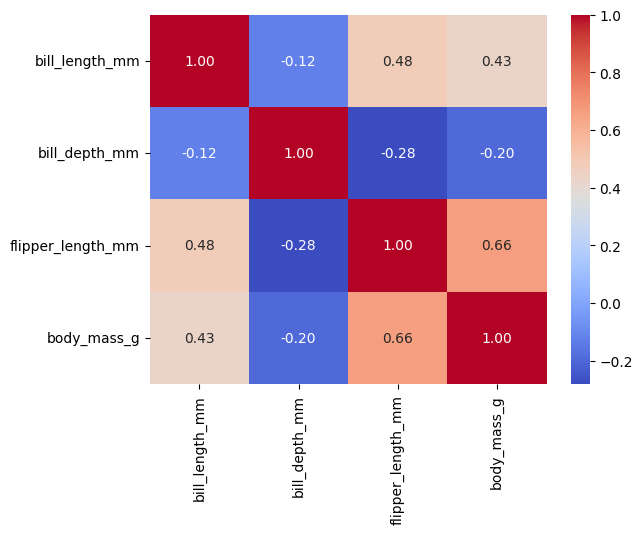

In [33]:
corr_kendall = df_penguins.select_dtypes(include=[np.number]).corr(method="kendall")
sns.heatmap(corr_kendall, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [36]:
from scipy.stats import kendalltau

tau, p_value = kendalltau(df_penguins["bill_depth_mm"].dropna(), df_penguins["flipper_length_mm"].dropna())

print(f"Tau: {tau}, p_value: {p_value}")

Tau: -0.28189449934662936, p_value: 2.2933766144417205e-14
